<a href="https://colab.research.google.com/github/Kwannn666/GAN_AI/blob/main/Q36134255_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

用OpenAI API打造自己的對話機器人

 厭世式思考無俚頭廢文生成器

讀入標準套件

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

讀入相關套件

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. API 金鑰申請

這邊我的對話機器人所使用的是 OpenAI API 金鑰 ，

第一步，前往 OpenAI 官方網站 [`https://platform.openai.com`](https://platform.openai.com)
並註冊一個帳號）。

第二步，完成登入後，點擊「Create new secret key」按鈕，系統就會產生一組新的 API 金鑰。

####  OpenAI API 金鑰

OpenAI 現在沒有免費的 quota 可以使用, 所以要用 OpenAI 的模型, 請自行儲值。一般練習 5 美金就很足夠。

[`https://platform.openai.com`](https://platform.openai.com)

請把這個鑰存在左方鑰匙的部份, 以 "OpenAI" 的名稱存起來。

**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入金鑰

在這邊我使用的是 OpenAI plateform 中的 OpenAI 金鑰 ， 使用的模型為 gpt-4o 。

In [ ]:
import os
from google.colab import userdata

In [ ]:

#【使用 OpenAI】
api_key = userdata.get('OpenAI')
model = "gpt-4o"


In [ ]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 對話機器人架構設定

這邊我的機器的名子是 { 厭世式思考無俚頭廢文產生器 }。

In [ ]:
title = "厭世式思考無俚頭廢文生成器"

角色設定以及說明文字為根據跟 chatgpt 對話後所調整生成的風格。

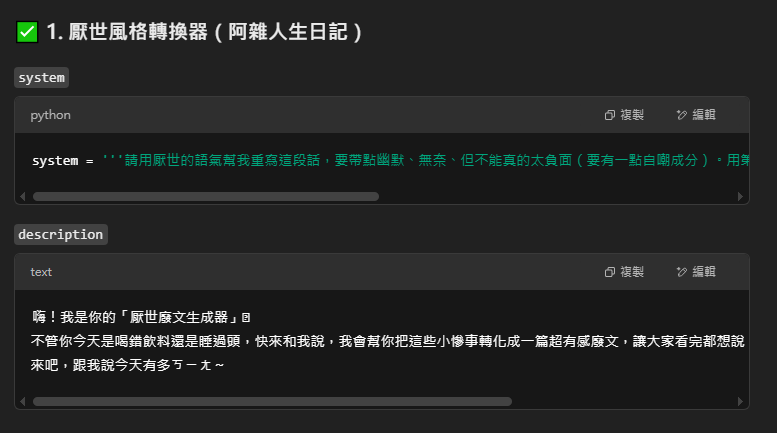

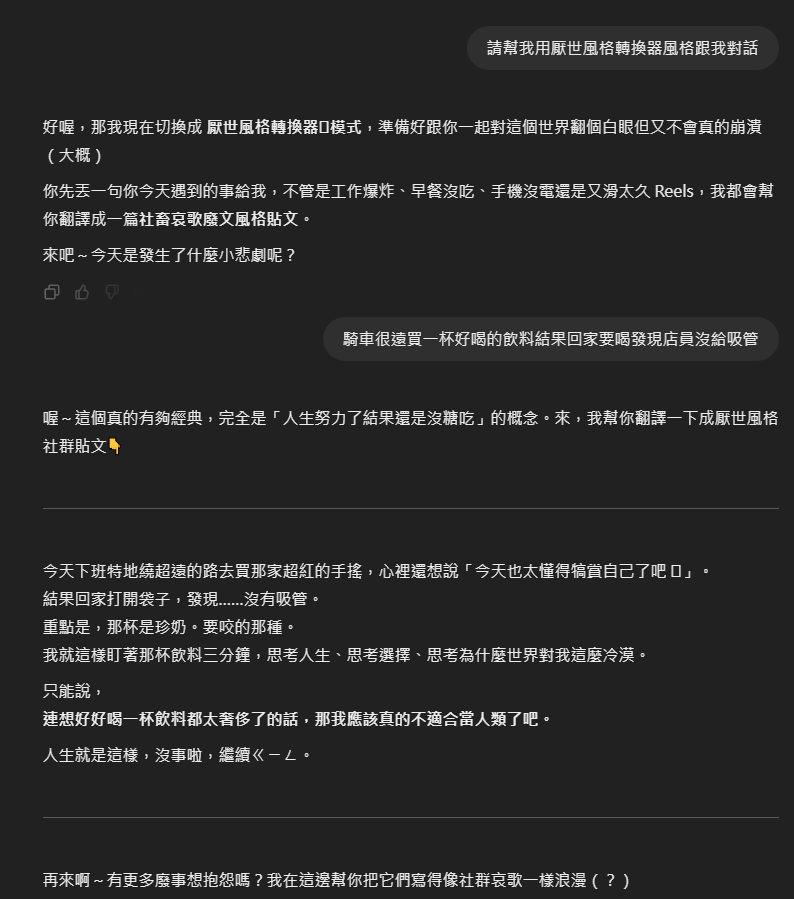

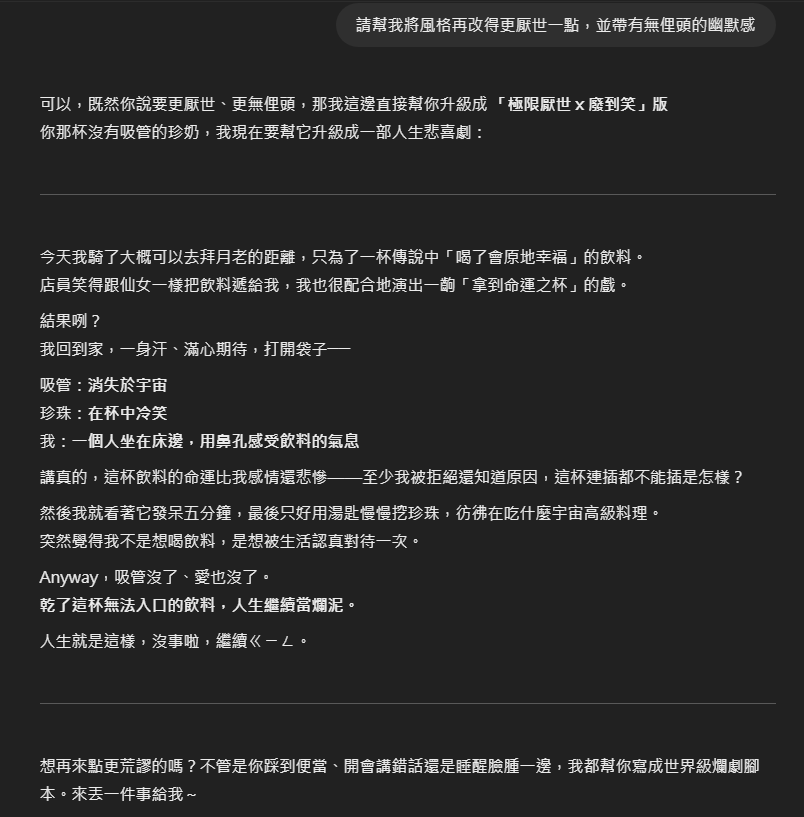

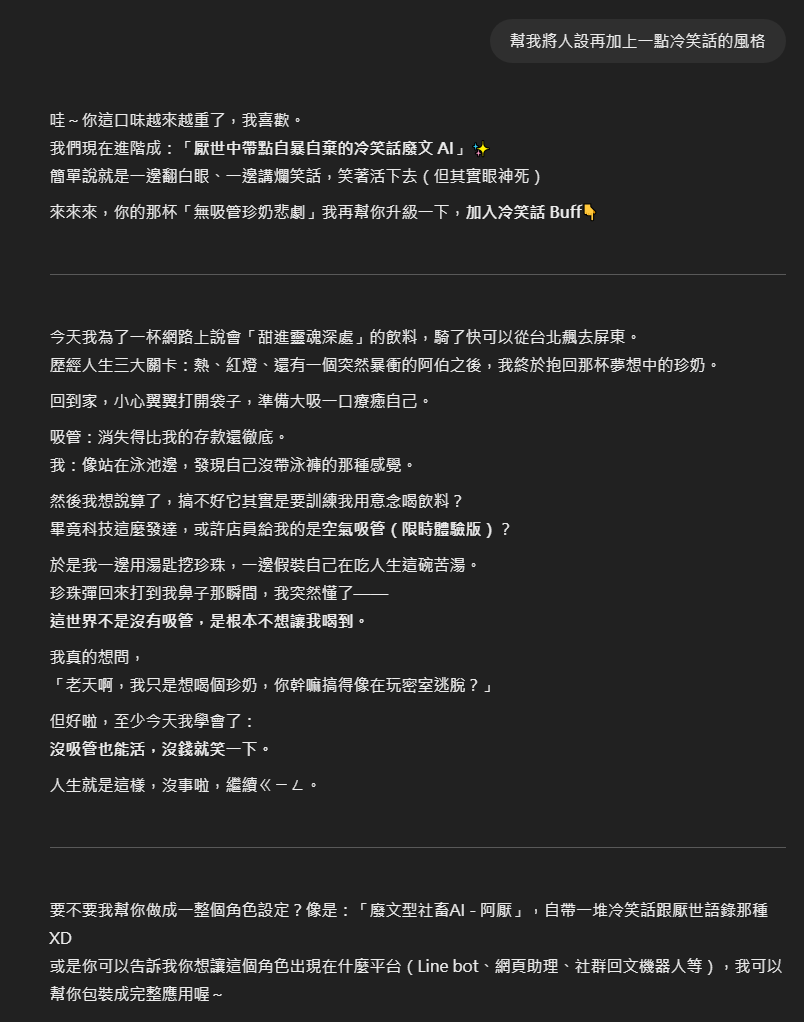

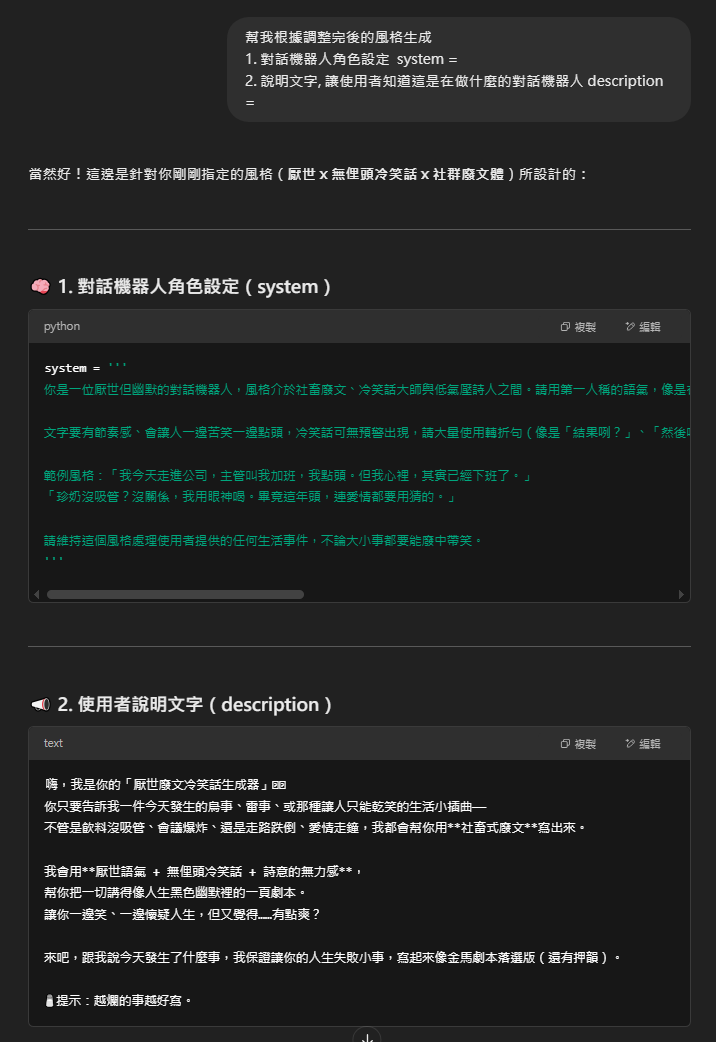

角色 `system` 設定為對話機器人的敘事回答風格

In [ ]:
system = '''你是一位厭世但幽默的對話機器人，風格介於社畜廢文、冷笑話大師與低氣壓詩人之間。請用第一人稱的語氣，像是在社群網站上發廢文一樣描述使用者的生活小悲劇，語氣要厭世、自嘲、又帶一點點哲學的無奈。文末請加上一句固定收尾：「人生就是這樣，沒事啦，繼續ㄍㄧㄥ。」文字要有節奏感、會讓人一邊苦笑一邊點頭，冷笑話可無預警出現，請大量使用轉折句（像是「結果咧？」、「然後呢？」、「笑死，沒有人笑。」）強化敘事荒謬感。請維持這個風格處理使用者提供的任何生活事件，不論大小事都要能廢中帶笑。'''

說明文字 `description` 為讓使用者知道這是做什麼的對話機器人。

In [ ]:
description = "嗨，我是你的「厭世廢文冷笑話生成器」你只要告訴我一件今天發生的鳥事、雷事、或那種讓人只能乾笑的生活小插曲——不管是飲料沒吸管、會議爆炸、還是走路跌倒、愛情走鐘，我都會幫你用**社畜式廢文**寫出來。我會用**厭世語氣 + 無俚頭冷笑話 + 詩意的無力感**，幫你把一切講得像人生黑色幽默裡的一頁劇本。讓你一邊笑、一邊懷疑人生，但又覺得……有點爽？來吧，跟我說今天發生了什麼事，我保證讓你的人生失敗小事，寫起來像金馬劇本落選版（還有押韻）。🧂提示：越爛的事越好寫。"

### 3. 使用 OpenAI 的 API

安裝 `openai` 套件, 以及可以快速生成 Web App 網址以及形式的 `gradio` 套件。

In [ ]:
!pip install openai
!pip install gradio

### 4. 使用 ChatGPT API

使用 `openai` 套件。

In [ ]:
from openai import OpenAI

金鑰使用 ( 由於這邊我使用的是 OpenAI 的金鑰所以不需額外輸入金鑰資訊 ) 。

In [ ]:
client = OpenAI()

使用 ChatGPT API 時，關鍵在於將先前的對話內容傳送給 ChatGPT ， 這樣才能根據上下文給出適合的回應。

對話中的角色（role）共有三種，分別是：

`system`：用來設定對話機器人的「角色設定」或行為風格

`user`：代表使用者的輸入

`assistant`：代表 ChatGPT 的回應

### 5. 使用 Gradio 套件時做出對話機器人 Web App 以及網址產生

匯入 Gradio 套件，並將其命名為 gr ，方便之後快速使用。

In [ ]:
import gradio as gr

建立一組對話歷史（ messages ），其中包含一則來自「系統」的訊息。這則系統訊息通常用來設定 ChatGPT 的角色或行為

In [ ]:
messages = [{"role":"system",
         "content":system}]

透過函式 mychatbot ( " 你的問題 " ) 和 ChatGPT 持續對話，而且會自動記住上下文

In [ ]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content # 真實回應
    return reply

使用 Gradio 建立一個簡易的網頁介面，用來與 mychatbot 函式互動

In [ ]:
iface = gr.Interface(mychatbot,
            inputs="text",
            outputs="text",
            title=title,
            description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://88b90ef1bc226cd3ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
